In [2]:
import pandas as pd
inputfile0 = 'user_loss.csv'  # 客户信息表路径
inputfile1 = 'meal_dishes_detail.csv'  # 菜品详情表路径
inputfile2 = 'info_new.csv'  # 订单表路径
inputfile3 = 'meal_order_detail.csv'  # 订单详情表路径
users = pd.read_csv(inputfile0, encoding = 'gbk')
dish = pd.read_csv(inputfile1, encoding = 'utf-8')
info = pd.read_csv(inputfile2, encoding = 'utf-8')
detail = pd.read_csv(inputfile3, encoding = 'utf-8')

In [3]:
import matplotlib.pyplot as plt
outputfile0 = 'sale_day.csv'  # 每日的用餐人数和营业额数据文件
outputfile1 = 'sale_sum.csv'  # 营业额数据文件
# 提取订单状态为1的数据
info_1 = info[info['order_status'].isin([1])]
info_1 = info_1.reset_index(drop=True)


In [4]:
info_1

,info_id,emp_id,number_consumers,mode,dining_table_id,dining_table_name,expenditure,dishes_count,accounts_payable,use_start_time,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1326,3556,4,NaN,1485,1006,423,13,423,2016/2/5 19:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1327,1874,7,NaN,1516,1038,1101,29,1101,2016/1/4 11:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1328,3484,5,NaN,1504,1010,437,20,437,2016/1/29 13:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1329,3639,2,NaN,1482,1003,251,8,251,2016/1/19 12:02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1330,3835,2,NaN,1480,1002,363,6,363,2016/7/18 12:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,7971,2442,4,NaN,1511,1023,710,16,710,2016/7/12 11:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6607,7972,3147,10,NaN,1509,1016,1318,46,1318,2016/7/21 12:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6608,7973,1293,2,NaN,1482,1002,346,6,346,2016/1/20 19:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6609,7974,1947,8,NaN,1492,1015,1401,41,1401,2016/3/28 19:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 统计每日用餐人数与营业额
for i,k in enumerate(info_1['use_start_time']):
    y = k.split()
    y = pd.to_datetime(y[0])
    info_1.loc[i,'use_start_time'] = y
groupbyday = info_1[['use_start_time','number_consumers','accounts_payable']].groupby(by='use_start_time')


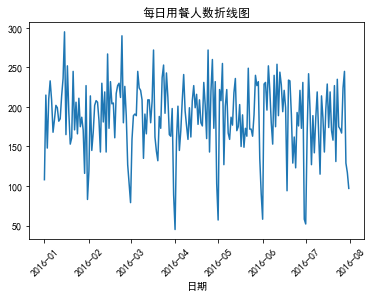

In [6]:
sale_day = groupbyday.sum()
# 导出每日的用餐人数和营业额
sale_day.columns = ['人数','销量']
sale_day.to_csv('outputfile0',encoding="utf-8_sig")
# 单独导出营业额，之后会用到
sale_sum = sale_day.iloc[:28,1]
sale_sum.to_csv('outputfile1',encoding='utf-8_sig', header=1)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 每日用餐人数折线图
plt.title('每日用餐人数折线图')
plt.xlabel('日期')
ax = plt.gca()
plt.xticks(rotation=45)  # 将x轴刻度标签旋转45度
plt.plot(sale_day['人数'])
plt.show()

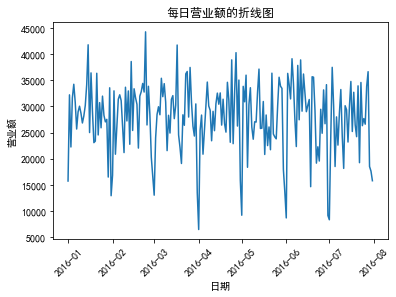

In [7]:
# 画出每日营业额的折线图
# 清空画板
plt.figure()
plt.title('每日营业额的折线图')
plt.xlabel('日期')
plt.ylabel('营业额')
plt.plot(sale_day['销量'])
plt.xticks(rotation=45)  # 将x轴刻度标签旋转45度
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

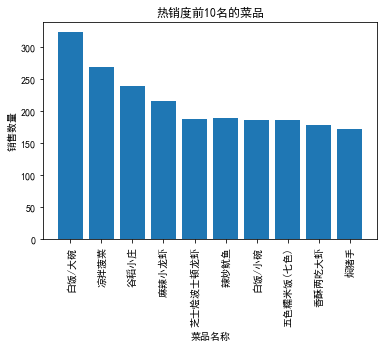

In [8]:
import numpy as np
import matplotlib.pyplot as plt

outputfile0 = 'sales_volume.csv'  # 菜品热销度数据文件
# 计算菜品热销度
detail['dishes_name'] = detail['dishes_name'].apply(lambda x:
    x.replace(' ', '').replace('\n', '').replace('\r', ''))
detail['place_order_time'] = pd.to_datetime(detail['place_order_time'])
detail_data = detail[(detail['place_order_time'] >= pd.to_datetime('20160801')) & 
                     (detail['place_order_time'] <= pd.to_datetime('20180831'))]
sales_volume = pd.DataFrame(detail_data.groupby(by=['dishes_name'])[ 'counts'].count())
sales_volume['dishes_name'] = sales_volume.index.tolist()
sales_volume = sales_volume.reset_index(drop=True)
Qmax = np.max(sales_volume['counts'])
Qmin = np.min(sales_volume['counts'])
sales_volume['sales_hot'] = 0
for i in range(sales_volume.shape[0]):
    sales_volume['sales_hot'].iloc[i] = round((sales_volume['counts'].iloc[i]-Qmin)/(Qmax-Qmin),2)
sales_volume = sales_volume.sort_values(by='sales_hot', ascending = False)
sales_volume.to_csv('outputfile0', encoding='utf-8_sig')
sales_volume.head(10)
plt.figure()
plt.bar(sales_volume.head(10)['dishes_name'],sales_volume.head(10)['counts'])
plt.title('热销度前10名的菜品')
plt.xlabel('菜品名称')
plt.ylabel('销售数量')
plt.xticks(rotation=90)